In [46]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

taxi_company_trips = pd.read_csv(r'C:\Users\jonat\Documents\GitHub\Sprints\Sprint 7\data\moved_project_sql_result_01.csv')
neighborhood_trip_avg = pd.read_csv(r'C:\Users\jonat\Documents\GitHub\Sprints\Sprint 7\data\moved_project_sql_result_04.csv')
loop_to_ohare_trips = pd.read_csv(r'C:\Users\jonat\Documents\GitHub\Sprints\Sprint 7\data\moved_project_sql_result_07.csv')

In [47]:
def estudo_inicial(df):
    print(df.sample(10))
    print()
    print(df.info())
    print()
    print(df.describe())
estudo_inicial(taxi_company_trips)

                            company_name  trips_amount
46       3620 - 52292 David K. Cab Corp.            21
30                            Setare Inc           230
21                       American United          1404
14  Patriot Taxi Dba Peace Taxi Associat          2235
1              Taxi Affiliation Services         11422
16                          Blue Diamond          2070
19         Chicago Medallion Leasing INC          1607
38               6743 - 78771 Luhak Corp            33
28                           5 Star Taxi           310
53              5006 - 39261 Salifu Bawa            14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

       trips_amount
count     64.000000
mean    2145.484375
std     

### taxi_company_trips
company_name  = nome das companias

trips_amount = número total de corridas

Sem problemas nos tipos dos dados

In [48]:
estudo_inicial(neighborhood_trip_avg)

   dropoff_location_name  average_trips
70          Wrigleyville      14.233333
52        Little Village      33.800000
88                 Undef       3.800000
43         Mckinley Park      64.033333
83           Avalon Park       6.966667
76    Washington Heights       9.133333
82         South Deering       7.500000
54        North Lawndale      32.166667
61        Grand Crossing      22.600000
39        Jefferson Park      74.333333

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


### neighborhood_trip_avg
dropoff_location_name  = Nome do local de saída.

average_trips = número médio de corridas.

Sem problemas nos tipos dos dados

In [49]:
estudo_inicial(loop_to_ohare_trips)

                 start_ts weather_conditions  duration_seconds
648   2017-11-11 18:00:00               Good            2675.0
479   2017-11-25 19:00:00               Good            2280.0
1020  2017-11-04 07:00:00               Good            1260.0
674   2017-11-04 17:00:00                Bad            2580.0
631   2017-11-18 12:00:00                Bad            2877.0
657   2017-11-11 08:00:00               Good            1260.0
941   2017-11-11 03:00:00               Good            1203.0
567   2017-11-11 12:00:00               Good            2133.0
453   2017-11-25 12:00:00               Good            1620.0
897   2017-11-04 11:00:00               Good            2400.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

### loop_to_ohare_trips
 
 start_ts = tempo do começo da corrida
 
 weather_conditions =   se a condição do tempo era de chuva
 
 duration_seconds = quanto tempo durou a corrida até o destino 

 Tem um problema no start_ts onde não esta no tipo date. 

In [50]:
loop_to_ohare_trips['start_ts'] = pd.to_datetime(loop_to_ohare_trips['start_ts'])
loop_to_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [51]:
neighborhood_trip_avg.sort_values(by='average_trips', ascending=False).head(10)['dropoff_location_name'].tolist()


['Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

### Principais cidades
As principais cidade são : Loop, River North, Streeterville, West Loop, "OHare", Lake View, Grant Park, Museum Campus, Gold Coast and Sheffield & DePaul

C:\Users\jonat\AppData\Local\Temp\ipykernel_6528\3899911822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxi_company_trips, y='company_name', x='trips_amount', palette="viridis")


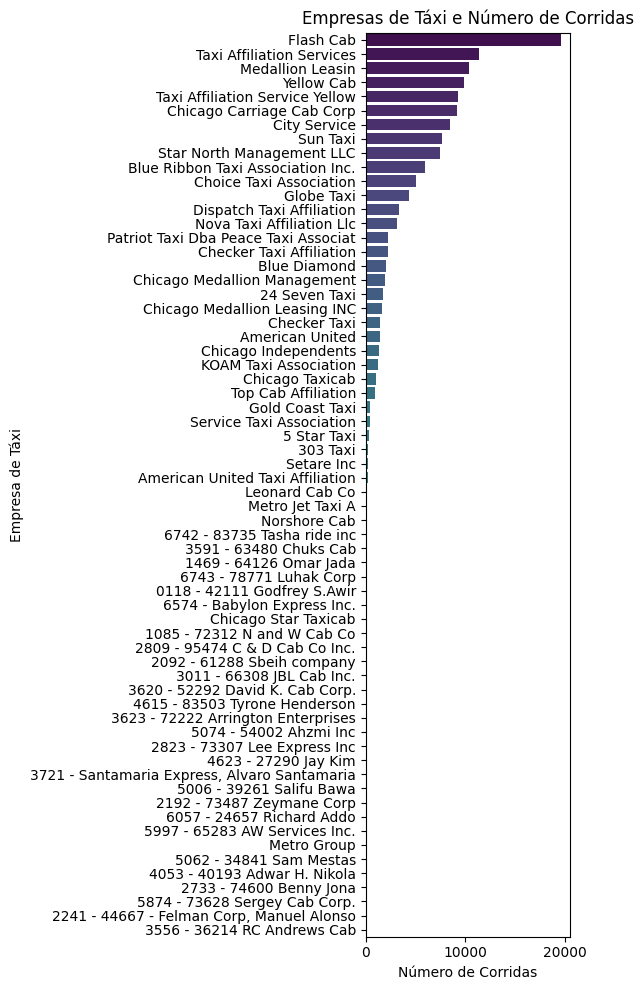

In [63]:
plt.figure(figsize=(6, 10))
sns.barplot(data=taxi_company_trips, y='company_name', x='trips_amount', palette="viridis")
plt.title('Empresas de Táxi e Número de Corridas')
plt.ylabel('Empresa de Táxi')
plt.xlabel('Número de Corridas')
plt.tight_layout()
plt.show()

### analise do gráfico
O gráfico tem uma calda longa e não é em formato de sino, oque indica um mercado muito concentrado.

A empresa Flash Cab tem quase o 2 de numero de corridas que seu concorrente logo a baixo. Indicando uma concentração de mercado. 

C:\Users\jonat\AppData\Local\Temp\ipykernel_6528\2652886162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_bairros, x='dropoff_location_name', y='average_trips', palette="magma")


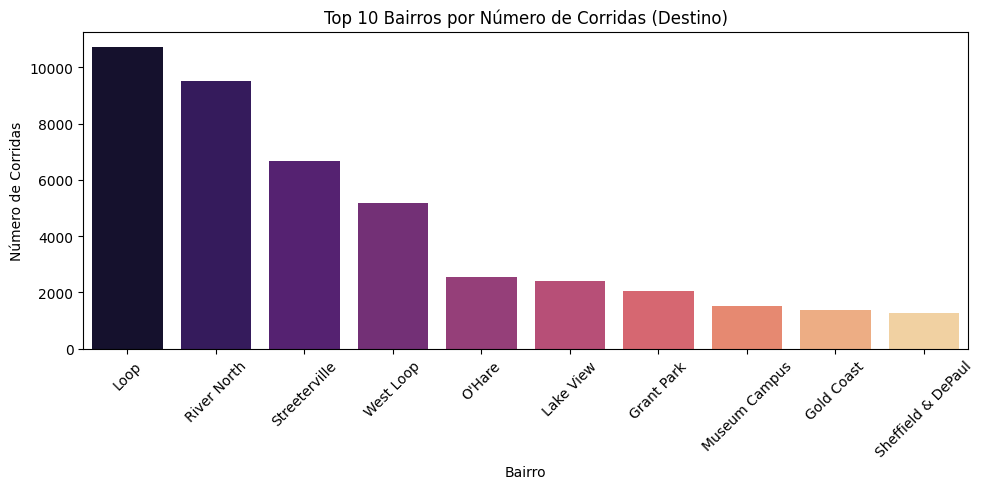

In [65]:
# Ordenando os bairros pelo número de corridas (ou média) em ordem decrescente e selecionando os top 10
top10_bairros = neighborhood_trip_avg.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top10_bairros, x='dropoff_location_name', y='average_trips', palette="magma")
plt.title('Top 10 Bairros por Número de Corridas (Destino)')
plt.xlabel('Bairro')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### analise do gráfico
O gráfico tem uma calda longa e não é em formato de sino, oque indica um mercado muito concentrado.

Os bairros de maior destino são :Loop,  River North, Streeterville e West Loop

In [252]:
# Separando os dados conforme a condição climática
good_weather = loop_to_ohare_trips[loop_to_ohare_trips['weather_conditions'] == 'Good']
bad_weather = loop_to_ohare_trips[loop_to_ohare_trips['weather_conditions'] == 'Bad']

# Impressão das hipóteses do teste
print("Hipóteses do teste:")
print("H0: A média de duração dos trajetos em condições 'Good' é igual à média em condições 'Bad'.")
print("Ha: A média de duração dos trajetos em condições 'Good' é diferente da média em condições 'Bad'.\n")

# Exibindo as médias de cada grupo
print(f"A média de duração para condições 'Good' é: {good_weather['duration_seconds'].mean():.0f}")
print(f"A média de duração para condições 'Bad' é: {bad_weather['duration_seconds'].mean():.0f}\n")

# Definindo nível de significância
alpha = 0.05

# Para igualar o tamanho das amostras, usamos o menor tamanho entre os dois grupos
quantidade = min(len(good_weather), len(bad_weather))

# Realizando o teste t para amostras independentes (sem pressupor variâncias iguais)
results = st.ttest_ind(
    good_weather['duration_seconds'].sample(n=quantidade), 
    bad_weather['duration_seconds'].sample(n=quantidade),
    equal_var=False
)

print(f'valor-p: {results.pvalue:.10f}')
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


Hipóteses do teste:
H0: A média de duração dos trajetos em condições 'Good' é igual à média em condições 'Bad'.
Ha: A média de duração dos trajetos em condições 'Good' é diferente da média em condições 'Bad'.

A média de duração para condições 'Good' é: 2000
A média de duração para condições 'Bad' é: 2427

valor-p: 0.0000000000
Rejeitamos a hipótese nula


### H0
O código separa os dados em trajetos com clima "Good" e "Bad", calcula as médias de duração de cada grupo e utiliza um teste t para verificar se há diferença significativa entre essas médias.

Escolhi o alpha de 5% por ser um padrão. 

# Conclusão

Este notebook realizou uma análise exploratória de três conjuntos de dados relacionados a corridas de táxi, com o objetivo de identificar padrões e entender melhor a distribuição das corridas na cidade.

- **Empresas de Táxi**: O conjunto de dados apresenta uma grande variação no número de corridas por empresa. Algumas companhias possuem apenas algumas corridas registradas, enquanto outras apresentam números significativamente mais altos, indicando diferentes níveis de demanda e operação no setor.

- **Média de Corridas por Bairro**: A análise revelou que áreas como *Loop, River North, Streeterville, West Loop* e *O'Hare* possuem maior demanda, sugerindo que esses locais são pontos estratégicos para o serviço de táxi.

- **Corridas para O'Hare**: Um problema inicial foi identificado na coluna de datas, que estava no formato incorreto, mas foi corrigido para permitir uma análise mais precisa da duração das corridas e da influência das condições climáticas nos trajetos.

### Considerações Finais

Este estudo fornece uma base sólida para investigações mais aprofundadas, como a influência de fatores externos nas corridas, a sazonalidade da demanda e a eficiência operacional das empresas de táxi. Com a preparação adequada dos dados, futuras análises podem oferecer insights valiosos para otimizar o serviço e melhorar a experiência dos usuários.
